In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
data = pd.read_csv('/Users/stanislavyatsevich/Desktop/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: ylabel='Survived'>

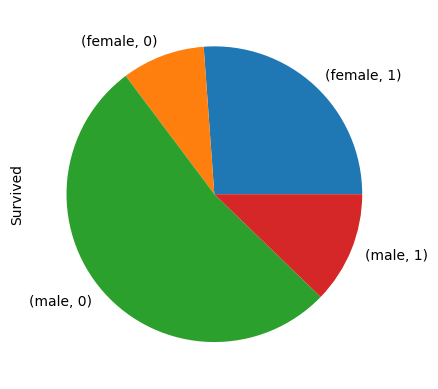

In [10]:
data.groupby(['Sex'])['Survived'].value_counts().plot(kind='pie')

In [11]:
data.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [12]:
data[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [13]:
data[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


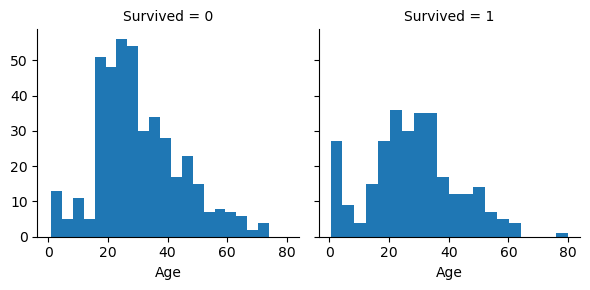

In [14]:
SurvToAge = sns.FacetGrid(data, col='Survived')
SurvToAge.map(plt.hist, 'Age', bins=20)

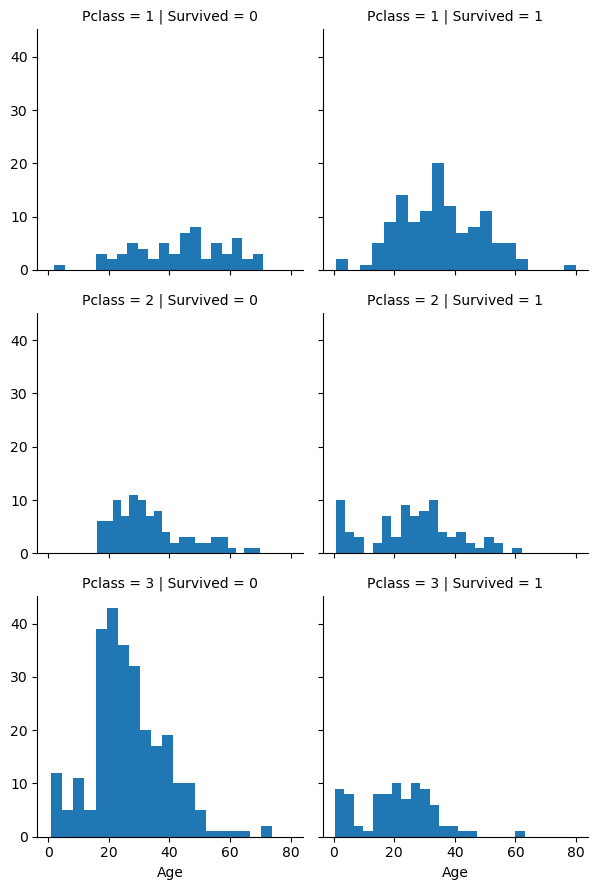

In [15]:
SurvToClass = sns.FacetGrid(data, col='Survived', row='Pclass')
SurvToClass.map(plt.hist, 'Age', bins=20)
SurvToClass.add_legend()

/Users/stanislavyatsevich/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stanislavyatsevich/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


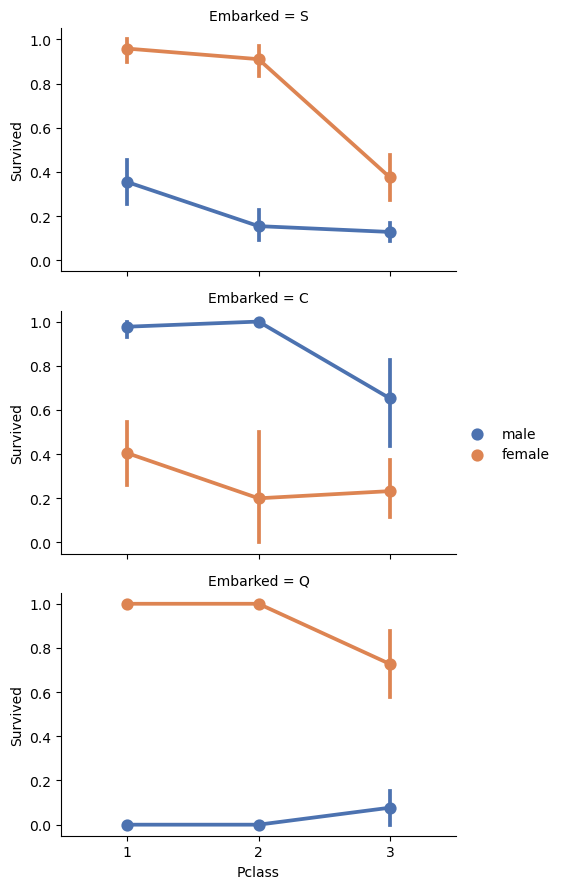

In [16]:
SurvToEmbarked = sns.FacetGrid(data, row='Embarked', aspect=1.6)
SurvToEmbarked.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
SurvToEmbarked.add_legend()

/Users/stanislavyatsevich/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


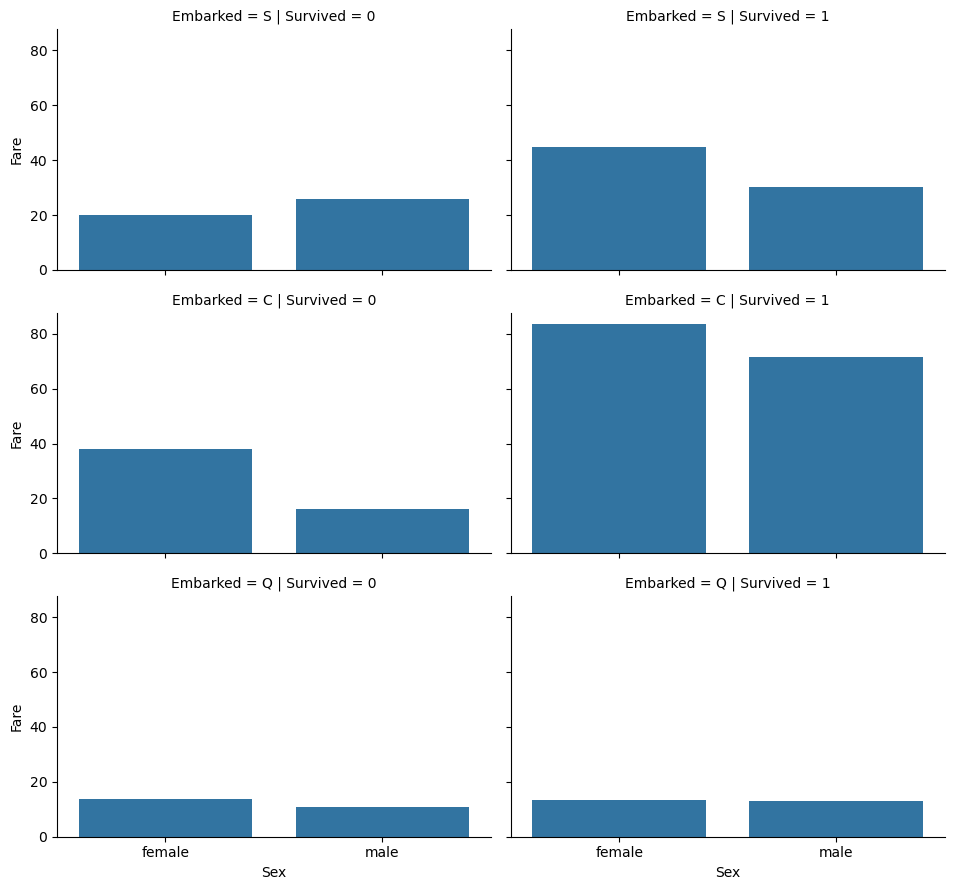

In [17]:
SurvToFare = sns.FacetGrid(data, col='Survived', row='Embarked', aspect=1.6)
SurvToFare.map(sns.barplot, 'Sex', 'Fare', errorbar=None)
SurvToFare.add_legend()

In [18]:
data = data.drop(['Cabin', 'Ticket'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [19]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
                                       'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [21]:
data[['Title', 'Survived']].groupby(['Title']).mean().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [23]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [24]:
data = data.drop(['Name', 'PassengerId'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [25]:
data['Sex'] = data['Sex'].map({'female' : 1, 'male' : 0}).astype(int)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


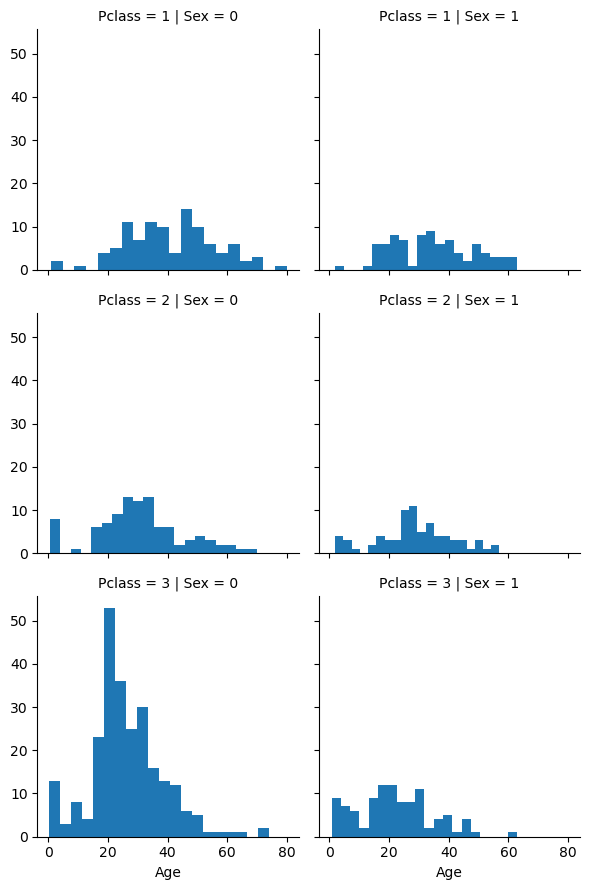

In [26]:
PclassToSex = sns.FacetGrid(data, col='Sex', row='Pclass')
PclassToSex.map(plt.hist, 'Age', bins=20)

In [27]:
meanAge = data['Age'].mean()
stdAge = data['Age'].std()
random_ages = np.random.normal(loc=meanAge, scale=stdAge, size=500)
random_ages_filtered = [age for age in random_ages if age > 0 and age < 90]
data['Age'] = data['Age'].map(lambda x: x if not np.isnan(x) else np.random.choice(random_ages_filtered))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [28]:
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
data[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [29]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
data[['IsAlone', 'Survived']].groupby(['IsAlone']).mean().sort_values(by='Survived', ascending=False)

,Survived
IsAlone,
0,0.505650
1,0.303538


In [30]:
data = data.drop(['Parch', 'SibSp'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,S,1,2,0
1,1,1,1,38.0,71.2833,C,3,2,0
2,1,3,1,26.0,7.9250,S,2,1,1
3,1,1,1,35.0,53.1000,S,3,2,0
4,0,3,0,35.0,8.0500,S,1,1,1


In [31]:
data['Age*Class'] = data['Age'] * data['Pclass']
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,22.0,7.2500,S,1,2,0,66.0
1,1,1,1,38.0,71.2833,C,3,2,0,38.0
2,1,3,1,26.0,7.9250,S,2,1,1,78.0
3,1,1,1,35.0,53.1000,S,3,2,0,35.0
4,0,3,0,35.0,8.0500,S,1,1,1,105.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    889 non-null    object 
 6   Title       891 non-null    int64  
 7   FamilySize  891 non-null    int64  
 8   IsAlone     891 non-null    int64  
 9   Age*Class   891 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


In [33]:
most_frequent_port = 'S'
data['Embarked'] = data['Embarked'].fillna(most_frequent_port)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Title       891 non-null    int64  
 7   FamilySize  891 non-null    int64  
 8   IsAlone     891 non-null    int64  
 9   Age*Class   891 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


In [34]:
data[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [35]:
data['Embarked'] = data['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2}).astype(int)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,22.0,7.2500,2,1,2,0,66.0
1,1,1,1,38.0,71.2833,0,3,2,0,38.0
2,1,3,1,26.0,7.9250,2,2,1,1,78.0
3,1,1,1,35.0,53.1000,2,3,2,0,35.0
4,0,3,0,35.0,8.0500,2,1,1,1,105.0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

X = data.drop('Survived', axis=1)
y = data['Survived']
X_origin = data.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   #нормализуем данные
X_test_scaled = scaler.transform(X_test)

In [38]:
LogRegressor = LogisticRegression()
LogRegressor.fit(X_train_scaled, y_train)
y_pred = LogRegressor.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)

78.21

In [41]:
LogRegressor.coef_

array([[-0.47642338,  1.06480757, -0.15473028,  0.19660319, -0.16592555,
         0.5415943 , -0.7186211 , -0.22114599, -0.24419671]])

In [42]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,22.0,7.2500,2,1,2,0,66.0
1,1,1,1,38.0,71.2833,0,3,2,0,38.0
2,1,3,1,26.0,7.9250,2,2,1,1,78.0
3,1,1,1,35.0,53.1000,2,3,2,0,35.0
4,0,3,0,35.0,8.0500,2,1,1,1,105.0


In [43]:
SVCRegressor = SVC()
SVCRegressor.fit(X_train_scaled, y_train)
y_pred = SVCRegressor.predict(X_test_scaled)
#round(roc_auc_score(y_test, y_pred) * 100, 2)
round(accuracy_score(y_test, y_pred) * 100, 2)

82.12

In [44]:
LinearSVCRegressor = LinearSVC()
LinearSVCRegressor.fit(X_train_scaled, y_train)
y_pred = LinearSVCRegressor.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)

/Users/stanislavyatsevich/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/stanislavyatsevich/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


78.77

In [45]:
KNN = KNeighborsClassifier(3)
KNN.fit(X_train_scaled, y_train)
y_pred = KNN.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)
#round(roc_auc_score(y_test, y_pred) * 100, 2)

81.01

In [46]:
SGD = SGDClassifier()
accuracy_array = list()
for i in range(10):
    SGD.fit(X_train_scaled, y_train)
    y_pred = SGD.predict(X_test_scaled)
    accuracy_array.append(round(accuracy_score(y_test, y_pred) * 100, 2))
np.array(accuracy_array).mean()

77.039

In [50]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_scaled, y_train)
y_pred = DecisionTree.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)
#round(f1_score(y_test, y_pred) * 100, 2)

78.21

In [51]:
RFClassifier = RandomForestClassifier()
RFClassifier.fit(X_train_scaled, y_train)
y_pred = RFClassifier.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)
#round(recall_score(y_test, y_pred) * 100, 2)

82.12

In [52]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [170]:
import xgboost as xgb
XGB = xgb.XGBClassifier(n_estimators=1000, max_depth=2, learning_rate=0.038, objective='binary:logistic')
XGB.fit(X_train_scaled, y_train)
y_pred = XGB.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)
#round(f1_score(y_test, y_pred) * 100, 2)

86.03

In [54]:
X_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked    891 non-null    int64  
 5   Title       891 non-null    int64  
 6   FamilySize  891 non-null    int64  
 7   IsAlone     891 non-null    int64  
 8   Age*Class   891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [178]:
import catboost
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin, y, test_size=0.2, random_state=42)
categorical_indices = np.array([0, 1, 4, 5, 6, 7])

boosting_model = catboost.CatBoostClassifier(cat_features=categorical_indices)
boosting_model.fit(X_train_origin, y_train)
#y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]
y_test_predicted = boosting_model.predict(X_test_origin)
accuracy_score(y_test, y_test_predicted)

Learning rate set to 0.008911
0:	learn: 0.6873903	total: 5.84ms	remaining: 5.83s
1:	learn: 0.6819339	total: 9.06ms	remaining: 4.52s
2:	learn: 0.6764803	total: 12.7ms	remaining: 4.21s
3:	learn: 0.6709617	total: 15.3ms	remaining: 3.8s
4:	learn: 0.6661109	total: 17.7ms	remaining: 3.52s
5:	learn: 0.6610204	total: 20ms	remaining: 3.32s
6:	learn: 0.6562469	total: 21.6ms	remaining: 3.06s
7:	learn: 0.6506642	total: 24ms	remaining: 2.97s
8:	learn: 0.6457260	total: 26ms	remaining: 2.87s
9:	learn: 0.6410461	total: 27.9ms	remaining: 2.76s
10:	learn: 0.6368982	total: 29.8ms	remaining: 2.68s
11:	learn: 0.6317904	total: 32.3ms	remaining: 2.66s
12:	learn: 0.6282193	total: 33.5ms	remaining: 2.54s
13:	learn: 0.6242057	total: 34.9ms	remaining: 2.46s
14:	learn: 0.6199466	total: 36.7ms	remaining: 2.41s
15:	learn: 0.6151598	total: 38.6ms	remaining: 2.37s
16:	learn: 0.6115505	total: 40ms	remaining: 2.31s
17:	learn: 0.6071316	total: 42.5ms	remaining: 2.32s
18:	learn: 0.6032082	total: 44.9ms	remaining: 2.32s
1

0.8212290502793296

In [80]:
from sklearn.ensemble import StackingClassifier
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
StackingClf = StackingClassifier(estimators=estimators, final_estimator=SVC())
StackingClf.fit(X_train_scaled, y_train)
y_pred = StackingClf.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)
#round(StackingClf.score(X_test_scaled, y_test) * 100, 2)

77.65

In [118]:
from sklearn.ensemble import BaggingClassifier
BaggingClf = BaggingClassifier(estimator=LogisticRegression(), n_estimators=100, random_state=42)
BaggingClf.fit(X_train_scaled, y_train)
y_pred = BaggingClf.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)
#round(BaggingClf.score(X_test_scaled, y_test) * 100, 2)

78.21

In [174]:
from sklearn.ensemble import GradientBoostingClassifier
#GradBoostClf = GradientBoostingClassifier(random_state=42)
GradBoostClf = GradientBoostingClassifier(max_depth=2, n_estimators=1400, random_state=42, learning_rate=0.038)
GradBoostClf.fit(X_train_scaled, y_train)
y_pred = GradBoostClf.predict(X_test_scaled)
round(accuracy_score(y_test, y_pred) * 100, 2)    

"""params = {
    'max_depth': range(2, 4),
    'n_estimators': range(500, 2001, 100),
    'learning_rate': [0.01, 0.05, 0.1]
}

GradBoostClf_Grid = GridSearchCV(GradBoostClf, params, cv=5, scoring='accuracy', n_jobs=-1)
GradBoostClf_Grid.fit(X_train_scaled, y_train)
y_pred = GradBoostClf_Grid.predict(X_test_scaled)"""
round(accuracy_score(y_pred, y_test) * 100, 2)
#GradBoostClf_Grid.best_params_

85.47